## Title: Predicting January Average High Temperatures in New York City
## Author: Ryan Krabbe  
## Github: https://github.com/ryankrabbe/datafun-07-ml

In [ ]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow as pa

## Part 1 - Chart a Straight Line

In [1]:
c = lambda f: 5/ 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

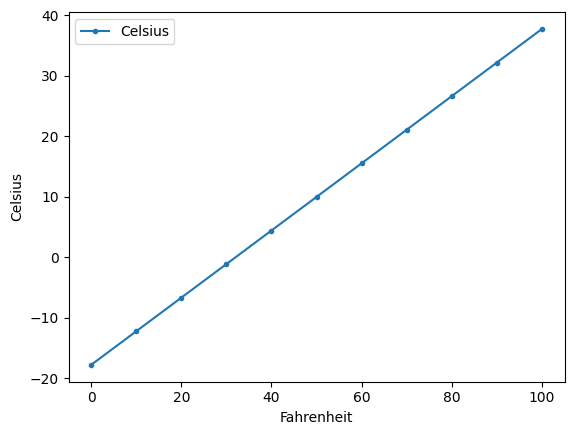

In [3]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Avg High Temp in NYC in January

### Section 1 - Data Acquisition

In [11]:
#Load Data
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [16]:
# Analyse Data
nyc.head()

,Date,Temperature,Anomaly
0,189501,29.6,-1.9
1,189601,28.3,-3.2
2,189701,29.2,-2.3
3,189801,33.7,2.2
4,189901,29.7,-1.8


In [20]:
# Analyse Data
nyc.tail()

,Date,Temperature,Anomaly
119,201401,28.7,-2.8
120,201501,30.0,-1.5
121,201601,34.5,3.0
122,201701,38.1,6.6
123,201801,31.8,0.3


### Section 3 - Data Cleaning

In [23]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [25]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,29.6,-1.9
1,189601,28.3,-3.2
2,189701,29.2,-2.3


In [26]:
nyc.Date.dtype

dtype('int64')

In [27]:
nyc.Date = nyc.Date.floordiv(100)

In [28]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,29.6,-1.9
1,1896,28.3,-3.2
2,1897,29.2,-2.3


### Section 4 - Descriptive Statistics

In [31]:
pd.set_option('display.precision', 2)

In [32]:
nyc.Temperature.describe()

count    124.00
mean      31.70
std        4.49
min       20.80
25%       28.88
50%       31.40
75%       34.60
max       42.40
Name: Temperature, dtype: float64

### Section 5 - Build The Model


In [33]:
from scipy import stats
liner_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [34]:
liner_regression.slope

0.024819826907946492

In [35]:
liner_regression.intercept

-16.862410700236026

In [36]:
liner_regression.slope * 2019 + liner_regression.intercept

33.24881982690794

In [37]:
liner_regression.slope * 1890 + liner_regression.intercept

30.047062155782847

### Section 6 - Predict

In [40]:
liner_regression.slope * 2024 + liner_regression.intercept

33.372918961447674

### Section 7 - Visualizations

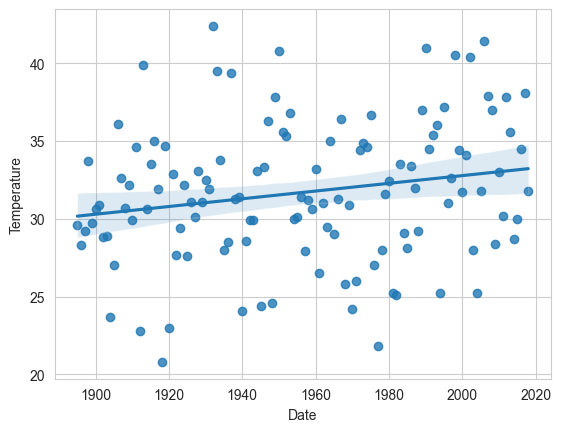

In [41]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [42]:
axes.set_ylim(10,70)

(10.0, 70.0)

## Part 3 - Prediction

In [46]:
import pandas as pd
df = pd.read_csv("ave_hi_nyc_df_jan_1895-2018.csv")
df.columns = ['Date', 'Temperature', 'Anomaly']
df.Date = df.Date.floordiv(100)

### Section 1 - Build The Model

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Date.values.reshape(-1, 1), df.Temperature.values, random_state=11)

In [51]:
X_train.shape

(93, 1)

In [52]:
X_test.shape

(31, 1)

In [53]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [54]:
linear_regression.coef_

array([1.78659856])

In [55]:
linear_regression.intercept_

-2.447656250000012

### Section 2 - Test the Model

In [56]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 31.50, expected: 25.80
predicted: 33.28, expected: 30.20
predicted: 31.50, expected: 32.20
predicted: 31.50, expected: 39.40
predicted: 31.50, expected: 28.00
predicted: 31.50, expected: 27.90
predicted: 31.50, expected: 32.90


### Section 3 - Predict

In [57]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([3613.62782452])

### Section 4 - Visualizations

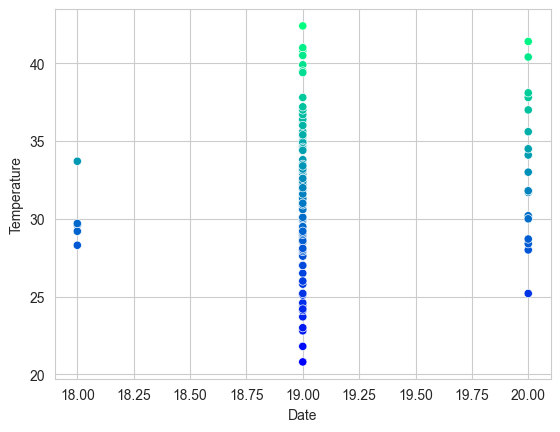

In [58]:
import seaborn as sns
axes = sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

In [59]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [60]:
import numpy as np
x = np.array([min(df.Date.values), max(df.Date.values)])

In [61]:
y = predict(x)

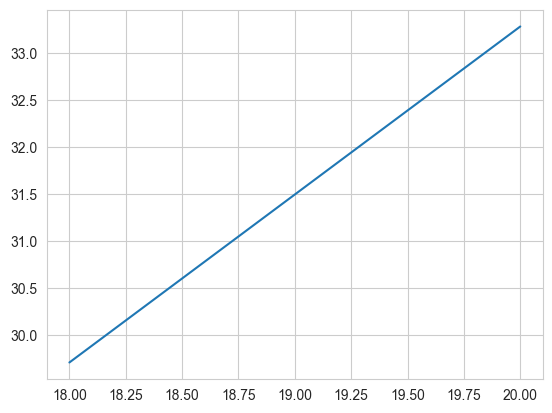

In [62]:
import matplotlib.pyplot as plt
line = plt.plot(x, y)

## Part 4 - Comparing the Two Methods and Final Thoughts

Both methods seem to be very comparable in the results. Overall, I thought the first method was a bit easier to implement, but I enjoyed working with both.  
I've learned so much throughout this course and I'm eager to see where the rest of the program takes me. I know this is only the beginning of my Data Analytics journey, but this course has laid the foundation for many of the skills that will be applied in future classes. I can't wait to see what the rest of the program has to offer! 